In [ ]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/length_stats.json',p[i]+'/tracto_op_2_Lest/stats_json/length_stats.json']
    d[i] = a

all_len = {}
data_len = []
data_len1 = []
for i in d:

    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0] 
    k1 = list(data1.keys())[0]
    if k == k1: 
        
        v = list(data[k].values()) # get the value of the subj dict
        v1 = list(data1[k1].values())

    
        #if len(v) == len(v1): # if the number of bundles generated is same
        vlen = []
        for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
            vlen.append(v[j]['mean_length'])
        mean = np.mean(vlen)
        vlen1 = []
        for j in range(len(v1)):
            vlen1.append(v1[j]['mean_length'])
        mean1 = np.mean(vlen1)

#             su += vlen          # sum 
#             su1 += vlen1
            
#         mean_diff = su / len(v)  # mean 
#         mean_diff1 = su1 / len(v1)
#         else:
#             mean_diff = 0
#             mean_diff1 = 0
    data_len.append(mean)
    data_len1.append(mean1)
    all_len[i] = [mean, mean1]

# print(all_len)

In [ ]:
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data

In [ ]:
def bland_altman_plot(data1, data2, labels, sym, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    for i in range(len(sym)):
        plt.scatter(mean[i], diff[i], c=labels[i], marker=sym[i], s=120, *args, **kwargs)
    
    legend_element = [Line2D([0],[0], lw=4,color='b',label='Male',markersize=8),
                      Line2D([0],[0], lw=4,color='r',label='Female',markersize=8),
                     Line2D([],[], marker='o',color='k',label='Age 5 - 5.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='x',color='k',label='Age 6 - 6.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='^',color='k',label='Age 7 - 7.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='+',color='k',label='Age 8 - 8.9',linestyle='None',markersize=10)]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [ ]:
from matplotlib.lines import Line2D 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
bland_altman_plot(data_len,data_len1,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for mean length with L(r) corruption',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [ ]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/volumes.json',p[i]+'/tracto_op_2_Lest/stats_json/volumes.json']
    d[i] = a

all_vol = {}
data_vol = []
data_vol1 = []
for i in d:
    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0]
    k1 = list(data1.keys())[0]
    if k == k1:
        v = list(data[k].values())
        v1 = list(data1[k1].values())
        vol = []
        for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
            vol.append(v[j]['volume'])
        mean = np.mean(vol)
        vol1 = []
        for j in range(len(v1)):
            vol1.append(v1[j]['volume'])
        mean1 = np.mean(vol1)
#         su = 0 
#         su1 = 0
#         if len(v) == len(v1):
#             for j in range(len(v)):
#                 #diff = abs ( ( v[j]['volume'] - v1[j]['volume'] ) / v1[j]['volume'] ) * 100
#                 vol = v[j]['volume']
#                 vol1 = v1[j]['volume']
#                 su += vol
#                 su1 += vol1
#             mean_diff = su / len(v)
#             mean_diff1 = su1 / len(v1)

    data_vol.append(mean)
    data_vol1.append(mean1)
    all_vol[i] = [mean, mean1]

In [ ]:
plt.figure(figsize=(15,12))
bland_altman_plot(data_vol,data_vol1,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for mean volume with L(r) corruption',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [28]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/length_stats.json',p[i]+'/tracto_op_2_Lest/stats_json/length_stats.json']
    d[i] = a

In [29]:
count = 0
dicts = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length

    
        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                diff[key] = mean_len[key] - mean_len1[key]
    else:
        diff = 'nan'
            
    dicts.append(diff)
   

In [30]:
#df = pd.DataFrame(columns=['AC', 'AF_L', 'AF_R', 'CC_Fr_1', 'CC_Fr_2', 'CC_Oc', 'CC_Pa', 'CC_Pr_Po', 'CC_Te', 'CG_L', 'CG_R', 'FAT_L', 'FAT_R', 'FPT_L', 'FPT_R', 'FX_L', 'FX_R', 'IFOF_L', 'IFOF_R', 'ILF_L', 'ILF_R', 'MCP', 'MdLF_L', 'MdLF_R', 'OR_ML_L', 'OR_ML_R', 'POPT_L', 'POPT_R', 'PYT_L', 'PYT_R', 'SCP_L', 'SCP_R', 'SLF_L', 'SLF_R', 'UF_L', 'UF_R'])
import pandas as pd
len_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':key}
            len_df = len_df.append(new_row, ignore_index=True )
            

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(17,12))
plt.rcParams.update({'font.size':22})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=df, flierprops=flierprops, width=0.7, palette="Spectral")
plt.title('Difference in mean length across bundles with L(r) corruption', fontsize = 25)
plt.xlabel('Bundles', fontsize = 25)
plt.ylabel('Difference in mean length', fontsize = 25)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#adjust_box_widths(fig,0.7)

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [ ]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(17,12))
plt.rcParams.update({'font.size':22})
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=edf, flierprops=flierprops, width=0.7, palette="Spectral")
plt.title('Difference in mean length across bundles', fontsize = 25)
plt.xlabel('Bundles', fontsize = 25)
plt.ylabel('Difference in mean length', fontsize = 25)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [8]:
def cohend(c0,c1):
    cohens_d = (np.mean(c0) - np.mean(c1)) / (np.sqrt((np.std(c0) ** 2 + np.std(c1) ** 2) / 2))
    return cohens_d

In [34]:
len_grouped = len_df.groupby(len_df['x'])
len_egrouped = len_edf.groupby(len_edf['x'])
len_egrouped.get_group(key)['0']

34     -10.475005
69      -0.349159
105      1.017451
140      2.858085
176      0.633474
          ...    
3628    -7.333777
3659    -2.103076
3692     1.451952
3724     2.535553
3760    -0.732008
Name: 0, Length: 109, dtype: float64

In [38]:
for key in len_egrouped.groups:
    la = cohend(len_egrouped.get_group(key)['0'],len_grouped.get_group(key)['0'])
    print(la)
    #print(key)

-0.24683781489596512
0.059531431858978454
0.18630361747274302
0.008966337539848665
-0.12020228757969312
0.2112896215935267
0.11812278901899975
0.025623522480745148
-0.4959095934718435
0.31591889341116924
-0.0817383982033327
-0.026571474321798162
0.0012742034625964295
0.10395365488904611
0.15849451606693998
-0.30806527401404804
-0.0012061515392290491
-0.30640601008442947
0.5426500578704055
-0.11272809204385886
-0.2404093760938394
-0.028530076841221715
0.24224505949242206
0.03961418753026278
0.044000057515706154
0.2540521223266746
0.20194768754669
-0.17098600925156757
0.3313541046195526
0.12611449525016105
0.15835994685094956
0.19089655330330196
0.17217825242637927
-0.058247504992258975
0.10985417714568664
0.11430893986097648
0.12712245833347277
0.01865466086289794
0.055599488967808426


In [14]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_est/stats_json/volumes.json',p[i]+'/tracto_op_2_est/stats_json/volumes.json']
    d[i] = a

In [15]:
count = 0
dictsvol = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['volume'] # assign bundle to mean length

    
        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['volume'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                diff[key] = mean_len[key] - mean_len1[key]
    else:
        diff = 'nan'
            
    dictsvol.append(diff)

In [16]:
edf = pd.DataFrame()
for i in dictsvol:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':key}
            edf = edf.append(new_row, ignore_index=True )

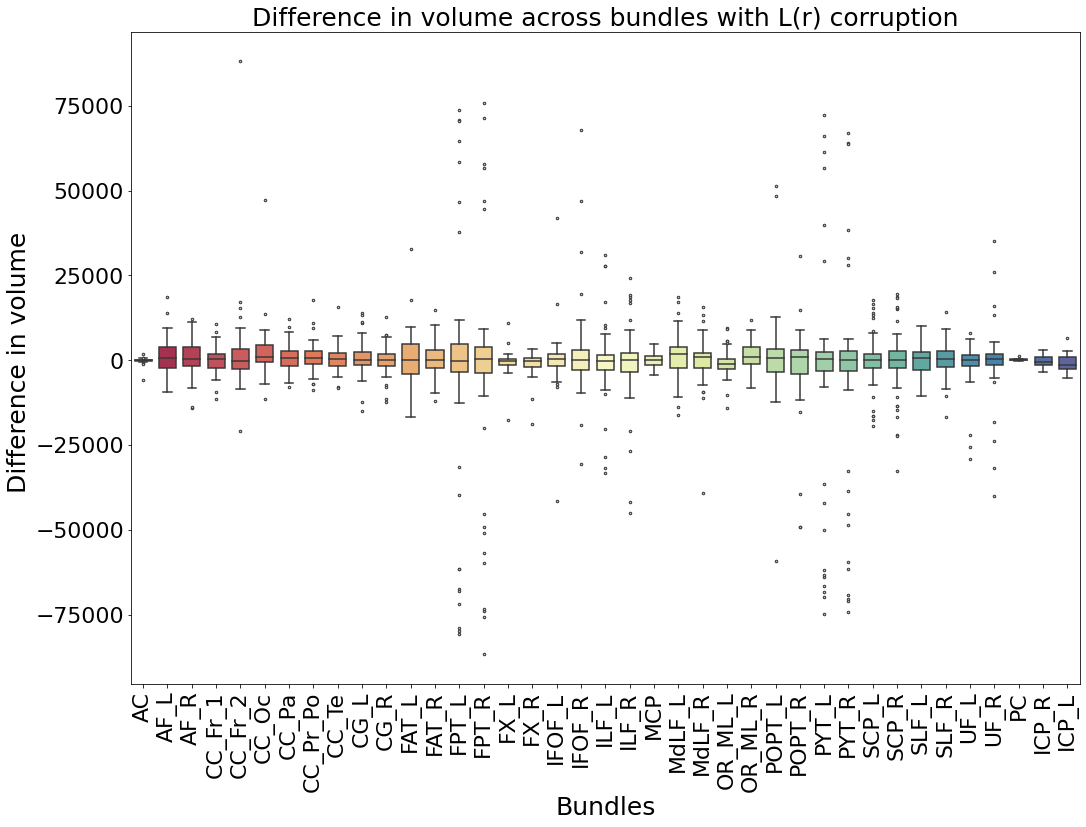

In [21]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(17,12))
plt.rcParams.update({'font.size':22})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=df, flierprops=flierprops, width=0.7, palette="Spectral")
plt.title('Difference in volume across bundles with L(r) corruption', fontsize = 25)
plt.xlabel('Bundles', fontsize = 25)
plt.ylabel('Difference in volume ', fontsize = 25)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#adjust_box_widths(fig,0.7)

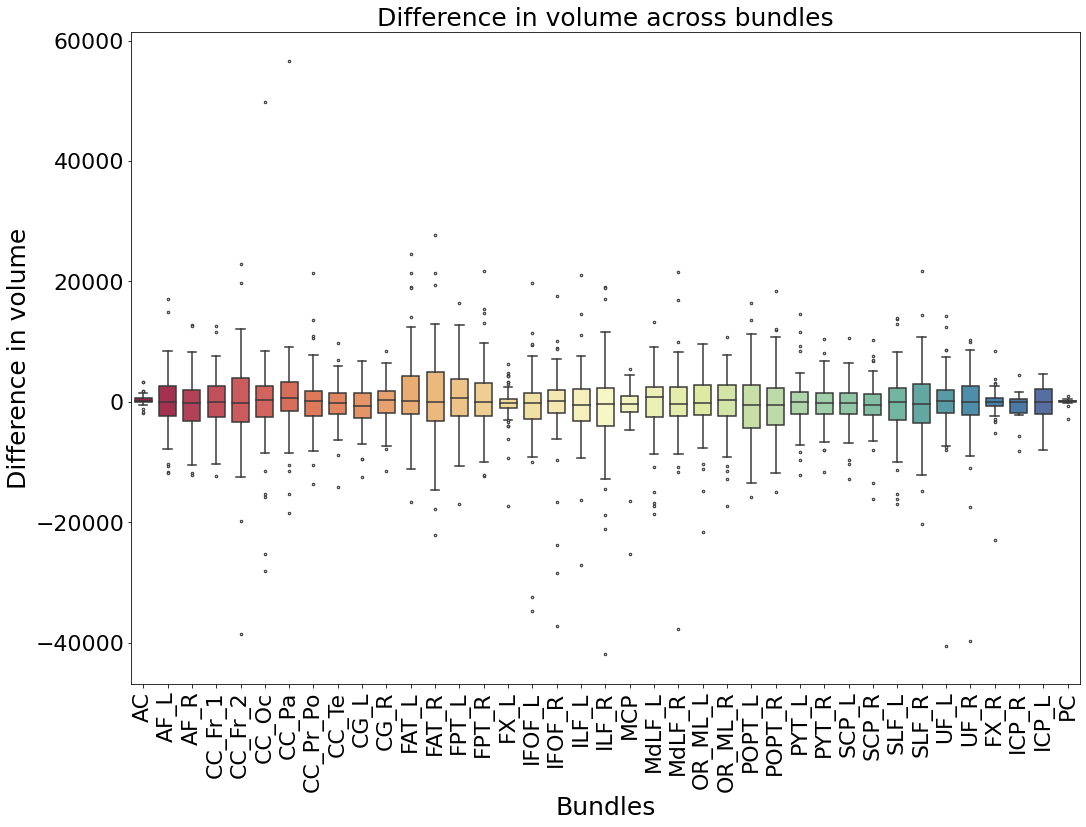

In [22]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(17,12))
plt.rcParams.update({'font.size':22})
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=edf, flierprops=flierprops, width=0.7, palette="Spectral")
plt.title('Difference in volume across bundles', fontsize = 25)
plt.xlabel('Bundles', fontsize = 25)
plt.ylabel('Difference in volume', fontsize = 25)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [39]:
vol_grouped = df.groupby(df['x'])
vol_egrouped = edf.groupby(edf['x'])
for key in vol_egrouped.groups:
    la = cohend(vol_egrouped.get_group(key)['0'],vol_grouped.get_group(key)['0'])
    print(la)
    #print(key)

0.48169543596552783
-0.21101780686823318
-0.13347757968630028
-0.016838771302135163
-0.22089728567764766
-0.34975109241308333
-0.0393113265783968
-0.1735540183323681
-0.20784305008527473
-0.2575760476931301
0.027322856142765084
0.09503763851789258
0.12343100133452053
0.14327089957654116
0.15815833780173366
0.034677210422608164
0.30217830193745865
-0.004983834770435715
-0.2712158770232635
-0.13195592350339042
-0.26594978475054604
-0.040828836407638555
-0.012541218796090013
-0.2505243983490438
-0.22466300914158863
0.004451500753769431
0.163950060916375
-0.301370364527123
-0.4767712522942192
-0.09297632602756337
0.17009928622910236
0.18436477768387494
0.1928906603969846
-0.07238856419286012
-0.04935969446200439
-0.18418209913914493
-0.0863546601377512
0.19206221096216847
0.009823860805215807
